>**NB**: The project was conducted by **BOLARINWA AISHAT** in partial fulfilment of the requirements for the **ALX-T Data Analyst Udacity NanoDegree Program**

# Project: Tweet Archive of Twitter User, [@dog_rates]('https://twitter.com/dog_rates') (Wrangling and Analysing Data)

>In this project, we will be analysing and visualising the dataset obtained from the twitter archive of [@dog_rates]('https://twitter.com/dog_rates') popularly known as [WeRateDogs]('https://en.wikipedia.org/wiki/WeRateDogs')

## Data Gathering
In this section, we will gather **all** three pieces of data needed for this project and load them in the notebook.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Importing all necessary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests as r
import json

In [2]:
#Loading the twitter archive data

df = pd.read_csv(r'C:\Users\Pc\Desktop\My Jupyter\ALX-T Project2\twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Using the requests library to download the tweet image prediction file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = r.get(url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)


In [4]:
df_ip = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

>**Because I could not have access to the twitter API, we'll be using the json file that was provided**

In [5]:
tj = []
with open('tweet-json.txt','r') as file:
    for i in file:
        tweets = json.loads(i)
        tj.append(tweets)

In [6]:
tj;

In [7]:
dff = pd.DataFrame(tj)

In [8]:
dff = dff[['id','geo','retweet_count','favorite_count']]

## Assessing Data
In this section, we will detect and document **eight (8) quality issues and two (2) tidiness issue** by using both **visual** assessment and **programmatic** assessement to assess the data.

It is important to **Note** the following key points before moving forward.

* We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
>
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate all acquired skills in data wrangling. The requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
>
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.



#### Visual Assessment

In [9]:
#visual assessment of the twitter archive data

df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
#visual assessment of the image prediction file

df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
#visual assessment of the extra information in the twitter json file

dff.head()

,id,geo,retweet_count,favorite_count
0,892420643555336193,None,8853,39467
1,892177421306343426,None,6514,33819
2,891815181378084864,None,4328,25461
3,891689557279858688,None,8964,42908
4,891327558926688256,None,9774,41048


#### Programmatic Assessment

>**Programmatic Assessment of the twitter archive data**

In [12]:
df.shape

(2356, 17)

so, this dataset has 2356 rows and 17 columns. We most likely will not be needing all the 17 columns...

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

some rating denominators are 0, this is not supposed to be.

In [16]:
df.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

There are some null values in the dataset.

In [17]:
df.duplicated().any()

False

There are no duplicates in the dataset. That is fantastic!!

>**Programmatic Assessment of the Image Prediction dataset**

In [18]:
df_ip.shape

(2075, 12)

There are 2075 rows and 12 columns in this dataset. Again, We most likely won't be needing all these columns.

In [19]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_ip['p1_dog'].unique()

array([ True, False])

The prediction shows that some of the images are not dogs.

In [21]:
df_ip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
df_ip.isna().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

There are no null values in this dataset. I likeyy

In [23]:
df_ip.duplicated().any()

False

There are no duplicates in the dataset.

>**Programmatic Assessment of the twitter json dataset**

In [24]:
dff.shape

(2354, 4)

There are 2354 rows and 4 columns in this dataset.

In [25]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   geo             0 non-null      object
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [26]:
dff.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [27]:
dff.isna().any()

id                False
geo                True
retweet_count     False
favorite_count    False
dtype: bool

The "geo" column has null values... 

In [28]:
dff.duplicated().any()

False

There are no duplicates in this dataset. None of the three dataset has duplicate values, but there are null values we need to address.

### Quality issues
1. The Tweet ID needs not be in integer format.
>
2. The Tweet ID should be the index of the datasets.
>
3. Some rating numerators and/or denominators are zero (0) which shouldn't be.
>
4. Some rating denominators are above 10 which is outside the scope of [WeRateDogs.]('https://en.wikipedia.org/wiki/WeRateDogs') 
>
5. Replies and retweets in the twitter archive dataset are not needed, only original tweets are.
>
6. Unnescessary columns in the datasets should be dropped
>
7. The prediction in the image prediction file shows that some of the images are not dogs and we're dealing only with dogs.
>
8. The confidence level in the image prediction dataset, ie p1_conf, p2_conf and p3_conf are better expressed as a percentage.

### Tidiness issues
1. The dog stages in the twitter archive dataset are better merged in a single column.
>
2. There's no point having the numerator and denominator of the dog ratings in separate columns.

## Cleaning Data
In this section, we will clean the dataset as regards **all** of the issues documented in assessment stage. 

**Note:** We will make a copy of the original datasets for the cleaning process. We will then merge the three individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to yield a high-quality and tidy master pandas DataFrame as result. 

In [29]:
# Making copies of original pieces of data

df_copy = df.copy()
df_ip_copy = df_ip.copy()
dff_copy = dff.copy()

### Issue #1:

The Tweet ID needs not be in integer format.

#### Define: 

Recall that we are working with the copies of the datasets we created. So we will convert the tweet_id columns in the twitter enhanced dataset and the image prediction dataset and the id column in the tweet json dataset from integer to strings. This is because we won't be carrying out any mathematical operations on them.

#### Code

In [30]:
#Checking the data type of the tweet id

df_copy['tweet_id'].dtype

dtype('int64')

In [31]:
#Checking the data type of the tweet id

df_ip_copy['tweet_id'].dtype

dtype('int64')

In [32]:
#Checking the data type of the id

dff_copy['id'].dtype

dtype('int64')

In [33]:
#Converting tweet id from integer to string

df_copy['tweet_id'] = df_copy['tweet_id'].astype(str)

In [34]:
#Converting tweet id from integer to string

df_ip_copy['tweet_id'] = df_ip_copy['tweet_id'].astype(str)

In [35]:
#Converting id from integer to string

dff_copy['id'] = dff_copy['id'].astype(str)

#### Test

In [36]:
df_copy['tweet_id'].dtype

dtype('O')

In [37]:
df_ip_copy['tweet_id'].dtype

dtype('O')

In [38]:
dff_copy['id'].dtype

dtype('O')

>The id's of the three datasets are now in string format

### Issue #2:

The Tweet ID should be the index of the datasets.

#### Define:

Because the tweet id is unique to each tweet we want to make it the index of the dataset such that, each observation will be based on a specific tweet id.

#### Code

In [39]:
#Setting tweet id as the index of the dataset

df_copy = df_copy.set_index('tweet_id')

In [40]:
#Setting tweet id as the index of the dataset

df_ip_copy = df_ip_copy.set_index('tweet_id')

In [41]:
#Setting id as the index of the dataset

dff_copy = dff_copy.set_index('id')

#### Test

In [42]:
df_copy.head(1)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [43]:
df_ip_copy.head(1)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [44]:
dff_copy.head(1)

,geo,retweet_count,favorite_count
id,,,
892420643555336193,None,8853,39467


>The id's of the three datasets are now the index of the datasets 

### Issue #3:

Some rating numerators and/or denominators are zero (0) which shouldn't be.

#### Define:

The rating denominator shouldn't be zero, you get that right? WeRateDogs is trying to rate the dogs over 10. So any number asides 10 shouldn't be captured. 
The rating numerator too is not supposed to be 0. It can't be so bad for the dog...

#### Code

In [45]:
#Retaining only rating numerators that is not 0

df_copy = df_copy[(df_copy['rating_numerator']!=0)]

In [46]:
#Retaining only rating denominators that is not 0

df_copy = df_copy[(df_copy['rating_denominator']!=0)]

#### Test

In [47]:
df_copy['rating_denominator'].unique()

array([ 10,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40, 130,
       110,  16, 120,   2], dtype=int64)

In [48]:
df_copy['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,   75,    7,   84,    9,   24,    8,    1,   27,    3,    4,
        165, 1776,  204,   50,   99,   80,   45,   60,   44,  143,  121,
         20,   26,    2,  144,   88], dtype=int64)

>0 is no longer a rating in the numerator and/or the denominator

### Issue #4:

Some rating denominators are above 10 which is outside the scope of [WeRateDogs.]('https://en.wikipedia.org/wiki/WeRateDogs') 

#### Define:

Remember I said earlier that WeRateDogs is trying to rate the dogs over 10. So any number asides 10 shouldn't be captured? So, apart from removing ratings with 0 as denominator which is ordinarily wrong mathematically, other numbers higher or lower than 10 should be removed.

#### Code

In [49]:
#Retaining only rating denominators that is 10

df_copy = df_copy[(df_copy['rating_denominator']==10)]

#### Test

In [50]:
df_copy['rating_denominator'].unique()

array([10], dtype=int64)

>Good!!! Now, the only ratings we have is over ten ( /10)

### Issue #5:

Replies and retweets in the twitter archive dataset are not needed, only original tweets are.

#### Define:

We only need the original tweets made by [@dog_rates]('https://twitter.com/dog_rates'). Because the twitter archive dataset contains replies to the tweets and retweets alongside the original tweets, we have to clean and retain only the original tweets. The dataset will be of higher quality that way you know?

#### Code

In [51]:
#Retaining only tweets that are not replies

df_copy = df_copy[df_copy['in_reply_to_status_id'].isna()]

In [52]:
#Retaining only tweets that are not retweets

df_copy = df_copy[df_copy['retweeted_status_id'].isna()]

#### Test

In [53]:
#Confirming if there are any replies left

df_copy['in_reply_to_status_id'].notna().any()

False

In [54]:
#Confirming if there are any retweets left

df_copy['retweeted_status_id'].notna().any()

False

>I am loving this!, what about you? The replies and the retweets have been removed completely.

### Issue #6:

Unnescessary columns in the datasets should be dropped


#### Define:

Like I said from the onset, we most likely won't be needing all those columns, here is where we drop them. In the twitter archive dataset, we have a lot of columns to drop, 10 precisely. Rather than writing a code to drop all those 10 columns, we will write a code to retain the 7 columns left. That way, the code is more readable and less ambiguous.

#### Code

In [55]:
#Retaining only the needed columns

df_copy = df_copy[['rating_numerator','rating_denominator','name','doggo','floofer','pupper','puppo']]

In [56]:
#Dropping the unnescessary columns

df_ip_copy = df_ip_copy.drop(columns = ['jpg_url','img_num'], axis=1) 

In [57]:
#Dropping the unnescessary columns

dff_copy = dff_copy.drop(columns = ['geo'], axis=1)

#### Test

In [58]:
df_copy.head(1)

,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,
892420643555336193,13,10,Phineas,None,None,None,None


In [59]:
df_ip_copy.head(1)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,
666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [60]:
dff_copy.head(1)

,retweet_count,favorite_count
id,,
892420643555336193,8853,39467


>Great! Only the needed columns are left. Our datasets are looking cleaner.

### Issue #7:

The prediction in the image prediction file shows that some of the images are not dogs and we're dealing only with dogs.

#### Define:

Not all the tweets on the WeRateDogs twitter page is about dogs. Ironical? Well, we have to filter out those ones.

#### Code

In [61]:
#Confirming if there is an instance where the tweet is not about dogs

df_ip_copy[(df_ip_copy['p1_dog'] == False) & (df_ip_copy['p2_dog'] == False) & (df_ip_copy['p3_dog'] == False)].sum().any()

True

So, it is true that some of the tweets is not about dogs and the three predictions confirms it. We want to retain tweets where at least, one of the three predictions says it's a dog!

In [62]:
#Retaining only tweets where at least one of the three dog predictions is true

df_ip_copy = df_ip_copy[(df_ip_copy['p1_dog'] == True) | (df_ip_copy['p2_dog'] == True) | (df_ip_copy['p3_dog'] == True)]

#### Test

In [63]:
#Confirming if there is still an instance where the tweet is not about dogs

df_ip_copy[(df_ip_copy['p1_dog'] == False) & (df_ip_copy['p2_dog'] == False) & (df_ip_copy['p3_dog'] == False)].sum().any()

False

>Can you see the magic? The tweets that are not about dogs have been removed from the dataset.

### Issue #8:

The confidence level in the image prediction dataset, ie p1_conf, p2_conf and p3_conf are better expressed as a percentage.

#### Define:

The confidence level is originally expressed as a fraction. This is harder to comprehend so, we'll be resorting to percentage.

#### Code

In [64]:
df_ip_copy['p1_conf'] = (df_ip_copy['p1_conf']*100).round(1)

In [65]:
df_ip_copy['p2_conf'] = (df_ip_copy['p2_conf']*100).round(1)

In [66]:
df_ip_copy['p3_conf'] = (df_ip_copy['p3_conf']*100).round(1)

#### Test

In [67]:
df_ip_copy.head()

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,
666020888022790149,Welsh_springer_spaniel,46.5,True,collie,15.7,True,Shetland_sheepdog,6.1,True
666029285002620928,redbone,50.7,True,miniature_pinscher,7.4,True,Rhodesian_ridgeback,7.2,True
666033412701032449,German_shepherd,59.6,True,malinois,13.9,True,bloodhound,11.6,True
666044226329800704,Rhodesian_ridgeback,40.8,True,redbone,36.1,True,miniature_pinscher,22.3,True
666049248165822465,miniature_pinscher,56.0,True,Rottweiler,24.4,True,Doberman,15.5,True


>The confidence level of the three predictions are now in percentages to one decimal place. More relateable!

### Issue #9:

The dog stages in the twitter archive dataset are better merged in a single column.

#### Define:

Rather than having various columns for dog stages and ticking which one the dog falls under, we want a single column that tells us outrightly, what stage the dog belongs.

#### Code

In [68]:
df_copy = df_copy.reset_index(level=0)
df_copy.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,13,10,Phineas,None,None,None,None
1,892177421306343426,13,10,Tilly,None,None,None,None
2,891815181378084864,12,10,Archie,None,None,None,None
3,891689557279858688,13,10,Darla,None,None,None,None
4,891327558926688256,12,10,Franklin,None,None,None,None


In [69]:
df_copy= pd.melt(df_copy, id_vars= ['tweet_id','name','rating_numerator', 'rating_denominator'], value_name='dog_stage', value_vars= ['doggo', 'floofer', 'pupper', 'puppo'])
df_copy

,tweet_id,name,rating_numerator,rating_denominator,variable,dog_stage
0,892420643555336193,Phineas,13,10,doggo,None
1,892177421306343426,Tilly,13,10,doggo,None
2,891815181378084864,Archie,12,10,doggo,None
3,891689557279858688,Darla,13,10,doggo,None
4,891327558926688256,Franklin,12,10,doggo,None
...,...,...,...,...,...,...
8311,666049248165822465,None,5,10,puppo,None
8312,666044226329800704,a,6,10,puppo,None
8313,666033412701032449,a,9,10,puppo,None
8314,666029285002620928,a,7,10,puppo,None


The new column, dog_stage has been created but there is another column, 'variable' that we don't need. We have to take it off by dropping the 'variable' column.

In [70]:
df_copy.drop(['variable'], inplace = True, axis = 1)
df_copy.head(0)

,tweet_id,name,rating_numerator,rating_denominator,dog_stage


In [71]:
df_copy.duplicated().any()

True

In [72]:
df_copy.drop_duplicates(inplace= True)

In [73]:
df_copy = df_copy[df_copy['dog_stage'].notnull()]

In [74]:
df_copy = df_copy.set_index('tweet_id')

#### Test

In [75]:
df_copy.head(10)

,name,rating_numerator,rating_denominator,dog_stage
tweet_id,,,,
892420643555336193,Phineas,13,10,None
892177421306343426,Tilly,13,10,None
891815181378084864,Archie,12,10,None
891689557279858688,Darla,13,10,None
891327558926688256,Franklin,12,10,None
891087950875897856,None,13,10,None
890971913173991426,Jax,13,10,None
890729181411237888,None,13,10,None
890609185150312448,Zoey,13,10,None


> We now have a single column for the various dog stages. Please note that the 'None' means that the stage of that particular dog is unknown or wasn't captured from the tweet.

### Issue #10:

There's no point having the numerator and denominator of the dog ratings in separate columns.

#### Define:

It's more of a repetition, having two columns to store the ratings. We will do two things to rectify this issue.

First, we will drop the rating denominator column because we already know the rating is over ten. Next, we will change the name of the rating numerator to ratings over ten. Same message, but in a more organised way. Let's go.

#### Code

In [76]:
df_copy.drop(['rating_denominator'], inplace = True, axis = 1)

In [77]:
#Renaming the columns

df_copy.rename(columns = {'name':'dog_name', 'rating_numerator':'rating/10'}, inplace = True)

In [78]:
#Rearranging the columns

df_copy = df_copy[['dog_name', 'dog_stage', 'rating/10']]

#### Test

In [79]:
df_copy.head(10)

,dog_name,dog_stage,rating/10
tweet_id,,,
892420643555336193,Phineas,None,13
892177421306343426,Tilly,None,13
891815181378084864,Archie,None,12
891689557279858688,Darla,None,13
891327558926688256,Franklin,None,12
891087950875897856,None,None,13
890971913173991426,Jax,None,13
890729181411237888,None,None,13
890609185150312448,Zoey,None,13


> The rating of the dogs are now in a single column. Perfecto!!

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

> Before we store the datastes, we will merge the three of them as on and store it as a single dataset.

In [80]:
#Setting the tweet id's as a column for merging.

df_copy = df_copy.reset_index(level=0)
df_ip_copy = df_ip_copy.reset_index(level=0)
dff_copy = dff_copy.reset_index(level=0)

In [81]:
#Changing the id column to tweet_id for uniformity
#And easier merging.

dff_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

In [82]:
twitter_archive_master= df_copy.merge(dff_copy, on= 'tweet_id', how= 'inner').merge(df_ip_copy, on= 'tweet_id', how= 'inner')
twitter_archive_master

,tweet_id,dog_name,dog_stage,rating/10,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,Tilly,None,13,6514,33819,Chihuahua,32.4,True,Pekinese,9.1,True,papillon,6.9,True
1,891815181378084864,Archie,None,12,4328,25461,Chihuahua,71.6,True,malamute,7.8,True,kelpie,3.1,True
2,891689557279858688,Darla,None,13,8964,42908,paper_towel,17.0,False,Labrador_retriever,16.8,True,spatula,4.1,False
3,891327558926688256,Franklin,None,12,9774,41048,basset,55.6,True,English_springer,22.6,True,German_short-haired_pointer,17.5,True
4,891087950875897856,None,None,13,3261,20562,Chesapeake_Bay_retriever,42.6,True,Irish_terrier,11.6,True,Indian_elephant,7.7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,666049248165822465,None,None,5,41,111,miniature_pinscher,56.0,True,Rottweiler,24.4,True,Doberman,15.5,True
1911,666044226329800704,a,None,6,147,311,Rhodesian_ridgeback,40.8,True,redbone,36.1,True,miniature_pinscher,22.3,True
1912,666033412701032449,a,None,9,47,128,German_shepherd,59.6,True,malinois,13.9,True,bloodhound,11.6,True
1913,666029285002620928,a,None,7,48,132,redbone,50.7,True,miniature_pinscher,7.4,True,Rhodesian_ridgeback,7.2,True


In [83]:
#saving the dataset to a csv file

twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, we will analyze and visualize our wrangled data, the master data. 

In [84]:
#Loading the dataset as though, it's new.

df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,dog_name,dog_stage,rating/10,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,Tilly,None,13,6514,33819,Chihuahua,32.4,True,Pekinese,9.1,True,papillon,6.9,True
1,891815181378084864,Archie,None,12,4328,25461,Chihuahua,71.6,True,malamute,7.8,True,kelpie,3.1,True
2,891689557279858688,Darla,None,13,8964,42908,paper_towel,17.0,False,Labrador_retriever,16.8,True,spatula,4.1,False
3,891327558926688256,Franklin,None,12,9774,41048,basset,55.6,True,English_springer,22.6,True,German_short-haired_pointer,17.5,True
4,891087950875897856,None,None,13,3261,20562,Chesapeake_Bay_retriever,42.6,True,Irish_terrier,11.6,True,Indian_elephant,7.7,False


The following are the insights we aim to get from our master data;

### Insights:
1. The ten most common dog names
>
2. The most common dog stage
>
3. Dog stage with the highest retweets
>
4. Dog stage with the highest likes
>
5. The correlation between likes and retweets, if there exists


### Insight 1

1. The ten most common dog names

In [85]:
df['dog_name'].value_counts().head(20)

None       490
a           49
Cooper      13
Lucy        11
Oliver      11
Charlie     11
the          9
Tucker       9
Penny        8
Daisy        7
Sadie        7
Jax          7
Bo           7
Winston      7
Toby         6
Lola         6
Bella        6
Milo         6
just         6
Maggie       6
Name: dog_name, dtype: int64

We can see that 490 dogs do not have their names recorded in the tweet and 49 of the dogs bear 'a'. That must have been a typo error but we can't conclude. Next on the list is Cooper. 

In conclusion, some of the most common dog names from the tweets are **Cooper**, **Lucy**, **Oliver**, **Charlie**, **Tucker**, **Daisy** etc

### Insight 2

2. The most common dog stage

In [86]:
df['dog_stage'].value_counts()

None       1649
pupper      173
doggo        63
puppo        22
floofer       8
Name: dog_stage, dtype: int64

Wow, majority of the dog stages are unknown. But, working with the known dog stages, pupper is the most common, followed by doggo. The least common is floofer. 
This will be better appreciated with a visualisation. Take a look

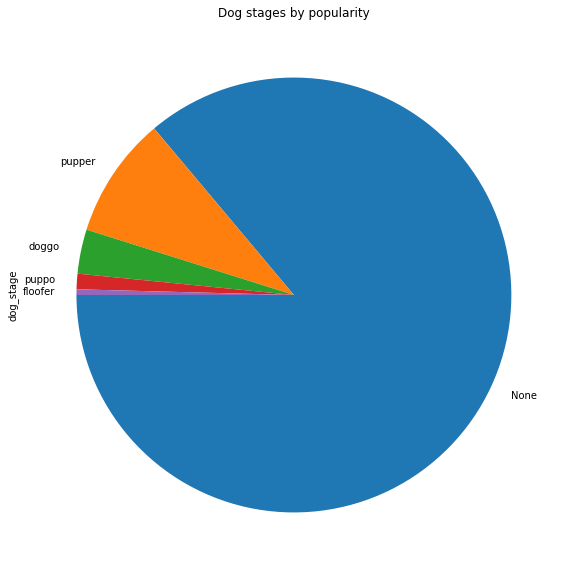

In [87]:
df['dog_stage'].value_counts().plot(kind= 'pie', figsize= (20,10), startangle= 180)
plt.title('Dog stages by popularity')
plt.savefig('piecahrt.png', dpi=300)

### Insight 3

3. Dog stage with the highest retweets

In [88]:
df.groupby('dog_stage')['retweet_count'].sum().sort_values(ascending=False).astype(int)

dog_stage
None       4675569
pupper      437735
doggo       436479
puppo       153087
floofer      38214
Name: retweet_count, dtype: int32

Again, pupper has the highest retweet of the known dog stages. It is expected because it is still the most posted dog stage. Although, this is not a guarantee, our findings just confirmed it.

### Insight 4

4. Dog stage with the highest likes

In [89]:
df.groupby('dog_stage')['favorite_count'].sum().sort_values(ascending=False).astype(int)

dog_stage
None       15345025
pupper      1356065
doggo       1209866
puppo        498458
floofer      109611
Name: favorite_count, dtype: int32

You guessed right. Pupper has the highest likes of the known dog stages.

### Insight 5

5. The correlation between likes and retweets, if there exists

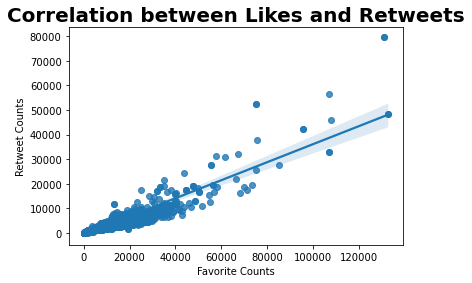

<Figure size 7200x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [90]:
sns.regplot(x='favorite_count', y='retweet_count', data= df)

plt.title('Correlation between Likes and Retweets', fontweight= 'bold', size=20)
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Counts')
plt.figure(figsize=(100, 50))
plt.show();

plt.savefig('corrplot.png', dpi=300)

There's actually a correlation between likes and retweets. This is a positive linear relationship in that the more the retweets, the more the likes. We should however remember that **'Correlation is not Causation'.** Hence, we cannot conclude that it is the high number of retweets for Pupper that caused the high number of likes and vice versa. Thank you.